In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df=df.iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [4]:
df.shape

(2035, 8)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
duplicates= df.duplicated()
duplicates.value_counts() 

False    2035
Name: count, dtype: int64

In [11]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


<Axes: >

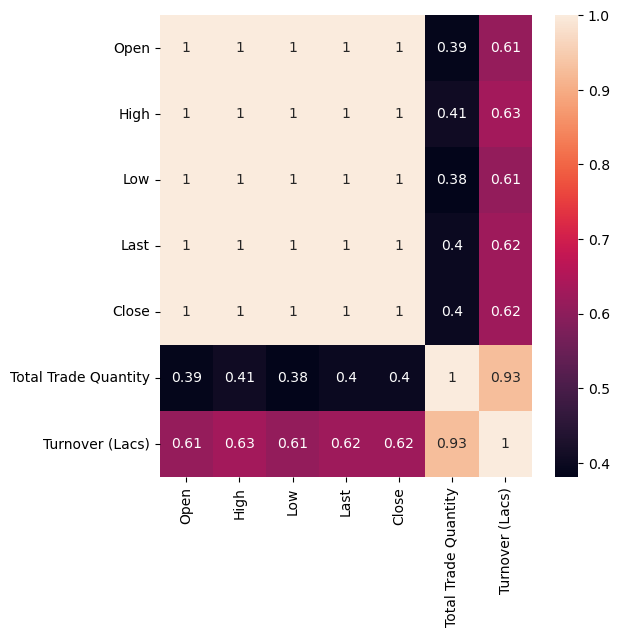

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(6,6))
sns.heatmap(numeric_df.corr(), annot=True)


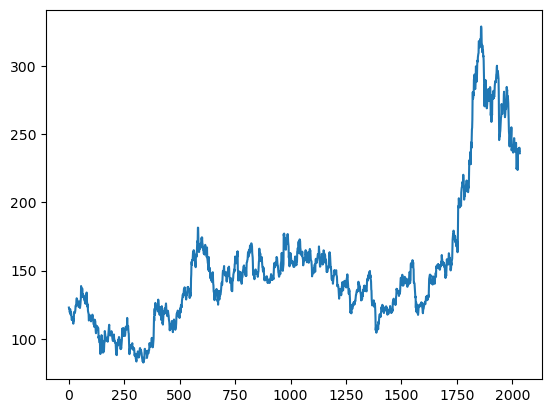

In [14]:
df_high=df.reset_index()['High']
plt.plot(df_high)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [16]:
df_high.shape

(2035, 1)

In [17]:
df_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [18]:
#Split the data into train and test split
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data,test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [19]:
training_size, test_size

(1526, 509)

In [20]:
training_size, test_size
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [22]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [24]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [26]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 646.8 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/32/1f/981809b77b71972beec34b3ff5422c1b1f7e519daac7b3cbd055c05ba2cf/libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl.met

In [28]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [30]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [32]:
from tensorflow.keras.layers import LSTM


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

### Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
Total params: 50800 (198.44 KB)
Trainable params: 50800 (198.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 4s 101ms/step - loss: 0.0262 - val_loss: 0.1039
Epoch 2/100
23/23 [==============================] - 2s 89ms/step - loss: 0.0023 - val_loss: 0.0591
Epoch 3/100
23/23 [==============================] - 2s 82ms/step - loss: 0.0013 - val_loss: 0.0610
Epoch 4/100
23/23 [==============================] - 2s 81ms/step - loss: 0.0011 - val_loss: 0.0608
Epoch 5/100
23/23 [==============================] - 2s 88ms/step - loss: 0.0010 - val_loss: 0.0538
Epoch 6/100
23/23 [==============================] - 2s 84ms/step - loss: 9.7819e-04 - val_loss: 0.0526
Epoch 7/100
23/23 [==============================] - 2s 83ms/step - loss: 0.0010 - val_loss: 0.0467
Epoch 8/100
23/23 [==============================] - 2s 85ms/step - loss: 9.4077e-04 - val_loss: 0.0487
Epoch 9/100
23/23 [==============================] - 2s 84ms/step - loss: 8.7642e-04 - val_loss: 0.0453
Epoch 10/100
23/23 [==============================] - 2s 89ms/step - loss: 8.9884e-04 -

In [39]:
#predictions
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 0s 12ms/step


In [40]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [42]:
# Assuming train_predict is a sequence of predictions for each input sequence
# You may need to adjust this based on your specific data and model architecture
single_time_step_predictions = train_predict[:, 0]

# Calculate the square root of mean squared error
rmse = math.sqrt(mean_squared_error(y_train, single_time_step_predictions))

# Print or use the RMSE value as needed
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 136.3241624605621


In [44]:
# Assuming test_predict is a sequence of predictions for each input sequence
# You may need to adjust this based on your specific data and model architecture
single_time_step_predictions_test = test_predict[:, 0]

# Calculate the square root of mean squared error
rmse_test = math.sqrt(mean_squared_error(y_test, single_time_step_predictions_test))

# Print or use the RMSE value as needed
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_test)


Root Mean Squared Error (RMSE) on Test Set: 215.16872176570246


In [46]:
# Assuming train_predict is a sequence of predictions for each input sequence
# You may need to adjust this based on your specific data and model architecture
single_time_step_predictions_train = train_predict[:, 0]

# Create an array to hold the predicted values for plotting
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(single_time_step_predictions_train) + look_back, 0] = single_time_step_predictions_train


In [49]:
# Assuming test_predict is a sequence of predictions for each input sequence
# You may need to adjust this based on your specific data and model architecture
single_time_step_predictions_test = test_predict[:, 0]

# Create an array to hold the predicted values for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:, :] = np.nan

# Adjust the indexing to match the length of single_time_step_predictions_test
testPredictPlot[len(train_predict) + look_back : len(train_predict) + look_back + len(single_time_step_predictions_test), 0] = single_time_step_predictions_test



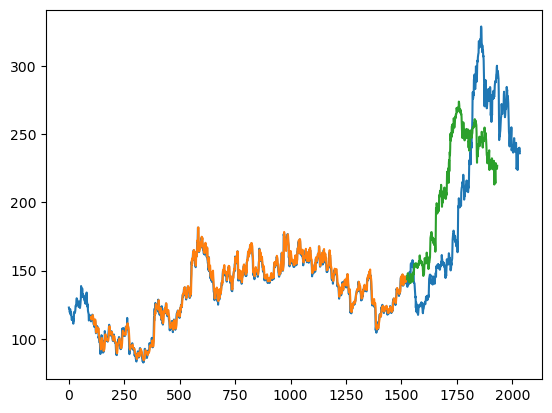

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [50]:
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [51]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [52]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [3]:
import numpy as np



In [5]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [6]:
day_new.shape

(100,)

In [7]:
day_pred.shape

(28,)

In [9]:
import pandas as pd

# Replace the following with your actual data or file path
# Example: df_high = pd.read_csv('your_data.csv')
df_high = pd.DataFrame({
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'High': [100, 105, 98]
})

# Now you can check the length of the DataFrame
print(len(df_high))


3


Index(['Date', 'High'], dtype='object')


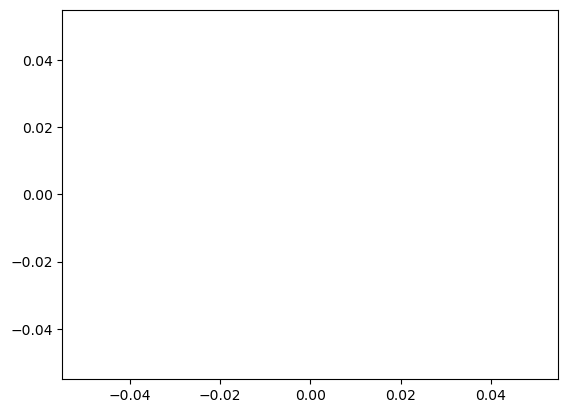

In [21]:
# Print the column names in your DataFrame
print(df_high.columns)

# Replace 'your_column' with the actual column name you want to use
data_new = df_high['Date'].tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])


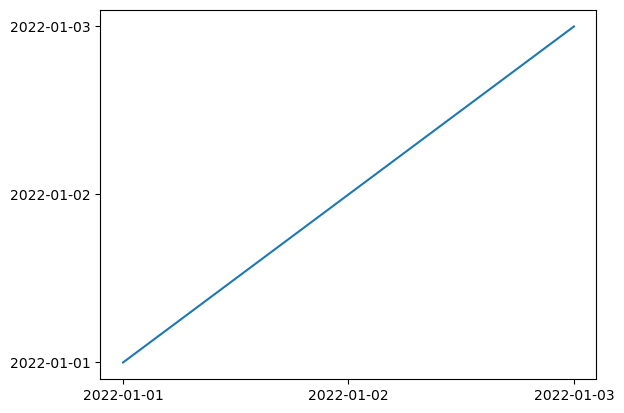

In [31]:
# Assuming data_new is a NumPy array with two columns (date and value)
plt.plot(data_new[:, 0], data_new[:, 0].tolist())

